In [28]:
import numpy as np # to perform vectorized operations
import pandas as pd # makes easy to do data analysis and use manipulation tools

import matplotlib as mpl #draw graphs
import matplotlib.pyplot as plt #help use matplotlib as MATLAB

from matplotlib.animation import FuncAnimation #import func animation

#dataset specific to our project
from sklearn.datasets import load_boston # to train and test model in our project
from sklearn.metrics import mean_squared_error #gives mean squared error between predicted values and true values
from sklearn.model_selection import train_test_split #takes datasets as features and target and splits that into two sets a training set and a testing set
from sklearn.preprocessing import MinMaxScaler # for normalizing the data

from IPython.display import HTML #to display results on screen

<font color=black><b>Data Preprocessing</b></font>

In [29]:
#Load the dataset
boston = load_boston()

#Description of data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
#Put the data into pandas DataFrames - DataFrames makes it easy to work with data and run queries.
features = pd.DataFrame(boston.data, columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
target = pd.DataFrame(boston.target, columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
max(target['target'])

50.0

In [7]:
min(target['target'])

5.0

In [8]:
#Concatenate features and target into a single DataFrame and don't forget to set the axis parameter
#default behaviour of a concatenate function in pandas is to concatenate rows
#axis=1 will make it concatenate column wise
df = pd.concat([features, target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<font color=black><b>Find Correlation between attributes and target</b></font>

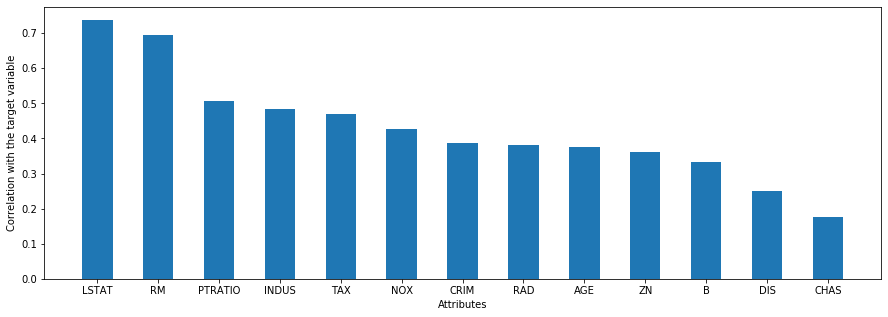

In [9]:
# Now, we want to know which of the methods best suited to predict target variable. We'll detemine it by examining statistical
# metric called correlation - can show whether and how strongly pairs of variables are related.

# Calculate correlation between every column on the data
# we'll choose the attribute with highest correlation value with the target
# more methods are available {pearson, kendall, spearman} or callable
corr = df.corr('pearson') 

# we are finding correlation of target with every attribute to choose the best one
corrs = [abs(corr[attr]['target']) for attr in list(features)]

# make a list of pairs
l = list(zip(corrs, list(features)))

# sort in descending order
l.sort(key = lambda x: x[0], reverse = True)

# "Unzip" pairs of two lists
# zip(*l) - takes a list that looks like [[a, b, c], [d, e, f], [g, h, i]]
# and returns [[a, d, g], [b, e, h], [c, f, i]]

corrs, labels = list(zip((*l)))

# Plot correlation wrt the target variables as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

<font color=black><b>Normalization</b></font>

In [10]:
# goal is to change the data such that all the values lies on the common scale, in this case we'll make it [0-1]
X=df['LSTAT'].values
Y=df['target'].values


In [11]:
# Before Normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [12]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, 1)) #Fit to data, then transform it.
X = X[:, -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1, 1))
Y = Y[:, -1]

In [13]:
# After Normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


<font color=black><b>Mean Squared Error</b></font>

In [14]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e * 1/(2*N)

<font color=black><b>Spliting data into training and testing set</b></font>

In [15]:

#0.2 indicates 20% of data is randomly sampled as testing data
# X- features, Y- target
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


<font color=black><b>Using Gradient descent</b></font>

In [16]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

In [17]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print("Error less than threshold error. Stopping gradient descent")
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

In [18]:
%%time

init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 246 ms


<font color=black><b>Visualization</b></font>

In [19]:
# As the number of iterations increases the changes will be less noticable
# Inorder to reduce the processing time for the animation it is adviced to choose smaller value
mc_values_anim = mc_values[0:250:5]


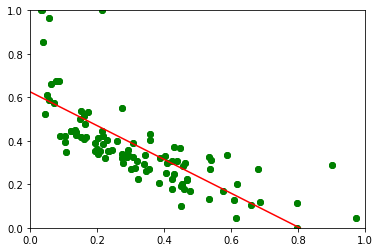

In [20]:
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro-', animated = True)

def init():
    plt.scatter(xtest, ytest, color = 'g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,

def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m*-.5+c
    x2, y2 = 1.5, m*1.5+c
    ln.set_data([x1, x2], [y1, y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)), init_func=init, blit=True)

HTML(anim.to_html5_video())

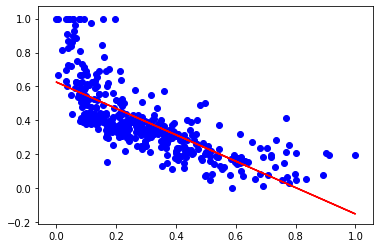

In [31]:
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m * xtrain + c), color = 'r')

Text(0, 0.5, 'Error')

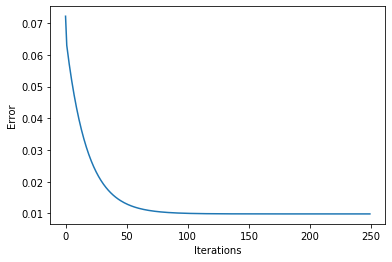

In [22]:
# plotting error values
plt.plot(np.arange(len(error_values)), error_values)
plt.xlabel('Iterations')
plt.ylabel('Error')

<font color=black><b>Prediction of prices</b></font>

In [23]:
# Calculate the predictions on the test set as a vectorized operation
predicted = (xtest * m) + c

In [24]:
# Compute MSE for the predicted value on the test set
mean_squared_error(ytest, predicted)

0.01654639328702258

In [25]:
# put xtest, ytest and predicted values into a single DataFrame so that we can see the predicted value alongside the testing set.
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns = ['x', 'target_y', 'predicted_y'])
p.head()


,x,target_y,predicted_y
0,0.201711,0.413333,0.468746
1,0.049669,0.608889,0.586901
2,0.450883,0.191111,0.275109
3,0.104581,0.395556,0.544228
4,0.428808,0.246667,0.292264


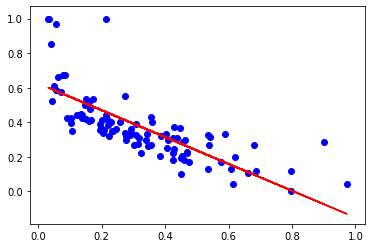

In [26]:
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

In [27]:
# revert normalization to obtain values in the given scaler
# reshape to change the shape that is required by the scaler
predicted = np.array(predicted.reshape(-1, 1))
xtest = xtest.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,9.04,23.6,26.09
1,3.53,32.4,31.41
2,18.07,13.6,17.38
3,5.52,22.8,29.49
4,17.27,16.1,18.15
